# Predicting Housing Values in Suburbs of Boston

* Data: https://www.kaggle.com/c/boston-housing/data
* Overview: This is my first end-to-end Machine Learning project for my class Applied Machine Learning and I am aiming to keep improving the models in this notebook as and when I learn new concepts and models.

### Import libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

/anaconda3/envs/i526/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load the data and perform initial explorations

In [2]:
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [2]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
print(boston.data.shape)

(506, 13)


In [5]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Convert to Pandas data frame

In [6]:
boston_pd = pd.DataFrame(boston.data)

In [7]:
print(boston_pd.head()) #the feature names are missing in the panda data frame.

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [8]:
boston_pd.columns = boston.feature_names #adding the column names

In [9]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
boston_pd['HousingPrice'] = boston.target #add the response variable to the data

In [11]:
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HousingPrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Split Training and Test data

In [12]:
X = boston_pd.iloc[:,:-1]
y = boston_pd.iloc[:,-1]

In [13]:
# Split 80% to training data and 20% to test data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Generate splits for training data

In [15]:
import numpy as np
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)
# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, format(str(np.array(data[0]))), format(str(np.array(data[1])))))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


### Modeling

In [98]:
results = pd.DataFrame(columns=["Model", "Test Accuracy"]) 
# to store results of each model

#### Linear Regression 

In [97]:
from sklearn.linear_model import LinearRegression

Let's perform linear regression to get the intuition of how the data is performing with respect to a simple model. 

Text(0.5,1,'Boston Housing - Predicted prices: $\\hat{Y}_i$')

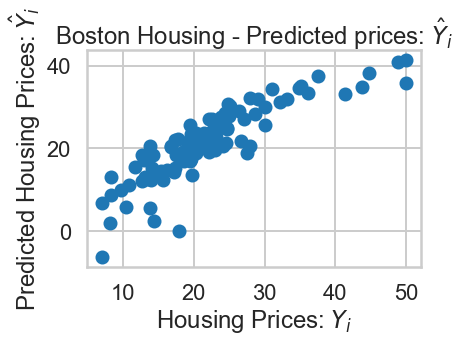

In [59]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)
plt.scatter(Y_test, Y_pred)
plt.xlabel("Housing Prices: $Y_i$")
plt.ylabel("Predicted Housing Prices: $\hat{Y}_i$")
plt.title("Boston Housing - Predicted prices: $\hat{Y}_i$")

In [60]:
mse_lr = mean_squared_error(Y_test, Y_pred)
print(mse_lr)

20.902843680372264


In [61]:
# Explained variance score: 1 is perfect prediction
explained_var_lr =r2_score(Y_test, Y_pred)
print('Variance score: %.2f' % explained_var_lr)

Variance score: 0.73


In [99]:
results.loc[len(results)] = ["Linear Regression", np.round(explained_var_lr, 2)]
results

,Model,Test Accuracy
0,Linear Regression,0.73


As we can see the linear regression is performing well but this is not a great model as we have many outliers at the lower left corner and upper right corner. Thus, trying a different model wouldn't harm us.

#### KNN Regression

In [85]:
# Grid Search for Algorithm Tuning
knn_lin = KNeighborsRegressor(n_jobs=-1)

In [86]:
params = {'knn__n_neighbors': list(range(1,31)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p': list(range(1,4))}

In [87]:
model = Pipeline([('standardize', StandardScaler()),
                  ('knn', KNeighborsRegressor())
                 ])

In [89]:
knn_gs = GridSearchCV(model, params, cv=20, verbose=2, refit='neg_mean_squared_error')

knn_gs.fit(X_train, Y_train)
y_pred = knn_gs.best_estimator_.predict(X_test)
#score = accuracy_score(Y_test, y_pred)

Fitting 20 folds for each of 180 candidates, totalling 3600 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ............

[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance ......

[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=3, knn__weights=distance ......

[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=3, knn__weights=uniform .......

[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=2, knn__weights=uniform .......

[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............

[CV]  knn__n_neighbors=7, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=distance ......

[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance ..........

[CV]  knn__n_neighbors=8, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=1, knn__weights=uniform ............

[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=uniform ..............

[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=12, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=12, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform ......

[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distanc

[CV]  knn__n_neighbors=14, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=2, knn__weights=distanc

[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=15, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=16, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=distance .....

[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=uniform ......

[CV]  knn__n_neighbors=18, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=3, knn__weights=distanc

[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform ......

[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distanc

[CV]  knn__n_neighbors=20, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=2, knn__weights=distanc

[CV]  knn__n_neighbors=21, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=21, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=21, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=21, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=21, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=21, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=21, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=21, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=21, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=21, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=21, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=21, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=21, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=21, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=21, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=22, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=22, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=22, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=22, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=22, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=22, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=22, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=2, knn__weights=distance .....

[CV]  knn__n_neighbors=22, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=22, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=22, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=22, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=22, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=22, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=23, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=23, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=1, knn__weights=uniform .

[CV]  knn__n_neighbors=23, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=23, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=23, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=23, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=23, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=23, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=23, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=23, knn__p=2, knn__weights=distanc

[CV]  knn__n_neighbors=24, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=24, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=24, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=24, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=24, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=24, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=24, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=24, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=24, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=24, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=24, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=24, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=24, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=24, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=24, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=25, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=25, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=25, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=25, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=25, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=25, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=25, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=25, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=25, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=25, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=25, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=25, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=25, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=25, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=25, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=26, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=2, knn__weights=uniform

[CV]  knn__n_neighbors=26, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=26, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=26, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=26, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=26, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=26, knn__p=3, knn__weights=distance ..

[CV]  knn__n_neighbors=27, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=27, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=27, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=27, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=27, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=27, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=27, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=2, knn__weights=uniform ......

[CV]  knn__n_neighbors=27, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=27, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=27, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=27, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=27, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=27, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=27, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=27, knn__p=3, knn__weights=distanc

[CV]  knn__n_neighbors=28, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=28, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=28, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=28, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=28, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=28, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=28, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=2, knn__weights=distance ...

[CV]  knn__n_neighbors=28, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=28, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=28, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=28, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=28, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=28, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=28, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=28, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=29, knn__p=1, knn__weights=uniform

[CV]  knn__n_neighbors=29, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=29, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=29, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=29, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=29, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=29, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=29, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=29, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=29, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=29, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=29, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=29, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=29, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=29, knn__p=2, knn__weights=distanc

[CV]  knn__n_neighbors=30, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=1, knn__weights=uniform ......

[CV]  knn__n_neighbors=30, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=30, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=30, knn__p=3, knn__weights=uniform ......

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   52.8s finished


In [90]:
print("Best model:", knn_gs.best_estimator_)

Best model: Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=1,
          weights='distance'))])


#### Examining GridSearch model parameters

In [91]:
best_p = knn_gs.best_params_["knn__p"]
best_n = knn_gs.best_params_["knn__n_neighbors"]
print(best_p, best_n)

1 3


In [94]:
print(knn_gs.cv_results_["param_knn__n_neighbors"],)
print(knn_gs.cv_results_["param_knn__p"], )
#print(knn_gs.cv_results_["param_knn__weights"], )
#print(knn_gs.cv_results_["mean_test_score"], )
print(knn_gs.cv_results_["mean_fit_time"])

[1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6 7
 7 7 7 7 7 8 8 8 8 8 8 9 9 9 9 9 9 10 10 10 10 10 10 11 11 11 11 11 11 12
 12 12 12 12 12 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15 16
 16 16 16 16 16 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19 19 20
 20 20 20 20 20 21 21 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23 24
 24 24 24 24 24 25 25 25 25 25 25 26 26 26 26 26 26 27 27 27 27 27 27 28
 28 28 28 28 28 29 29 29 29 29 29 30 30 30 30 30 30]
[1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1
 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1
 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2
 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2
 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3 1 1 2 2 3 3]
[0.00238929 0.0016618  0.00218126 0.00170813 0.00190662 0.00181754
 0.0018665  0.00165666 0.00183028 0.00164869 0.00197531 0.00189387
 0.002

In [95]:
mse = mean_squared_error(Y_test, y_pred)
print(mse)

12.698456780197306


In [96]:
explained_var =r2_score(Y_test, y_pred)
print('Variance score: %.2f' % explained_var)

Variance score: 0.84


In [101]:
#results.loc[len(results)] = ["KNN Regression2", np.round(explained_var, 2)]
results.loc[len(results)] = ["KNN Regression2", np.round(knn_gs.best_score_, 2)]
results

,Model,Test Accuracy
0,Linear Regression,0.73
1,KNN Regression2,0.79


#### KNN Regression with new parameters

This model I created to see more number of parameters and fewer neighbors

In [105]:
params_20 = {'knn__n_neighbors': list(range(1,21)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p': list(range(1,11))}

model = Pipeline([('standardize', StandardScaler()),
                  ('knn', KNeighborsRegressor())
                 ])

knn_gs_20 = GridSearchCV(model, params_20, cv=20, verbose=2,refit='neg_mean_squared_error')

knn_gs_20.fit(X_train, Y_train)
y_pred = knn_gs_20.best_estimator_.predict(X_test)
#score = accuracy_score(Y_test, y_pred)

Fitting 20 folds for each of 400 candidates, totalling 8000 fits
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=uniform ..............
[CV]  

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=2, knn__weights=uniform ..........

[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=3, knn__weights=distance .......

[CV]  knn__n_neighbors=1, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=5, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=6, knn__weights=distance ......

[CV]  knn__n_neighbors=1, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=1, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=8, knn__weights=uniform ..............

[CV]  knn__n_neighbors=1, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=1, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=1, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=1, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=1, knn__p=10, knn__weights=uniform ......

[CV]  knn__n_neighbors=2, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=2, knn__weights=uniform .........

[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=3, knn__weights=distance ......

[CV]  knn__n_neighbors=2, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=5, knn__weights=uniform ............

[CV]  knn__n_neighbors=2, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=6, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=6, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=6, knn__weights=distance .........

[CV]  knn__n_neighbors=2, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=8, knn__weights=uniform ...........

[CV]  knn__n_neighbors=2, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=2, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=2, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=9, knn__weights=distance .........

[CV]  knn__n_neighbors=2, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=2, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=2, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=2, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=2, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=1, knn__weights=uniform ......

[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=4, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=5, knn__weights=distance ......

[CV]  knn__n_neighbors=3, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=3, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=7, knn__weights=distance ..........

[CV]  knn__n_neighbors=3, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=3, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=9, knn__weights=uniform ..............

[CV]  knn__n_neighbors=3, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=3, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=3, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=3, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=3, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=3, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=3, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=3, knn__p=10, knn__weights=distanc

[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=2, knn__weights=distance ......

[CV]  knn__n_neighbors=4, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=4, knn__weights=distance ...........

[CV]  knn__n_neighbors=4, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=6, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=6, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=6, knn__weights=uniform .........

[CV]  knn__n_neighbors=4, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=7, knn__weights=distance ...........

[CV]  knn__n_neighbors=4, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=4, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=4, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=9, knn__weights=uniform .........

[CV]  knn__n_neighbors=4, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=4, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=4, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=4, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=4, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=4, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=4, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=4, knn__p=10, knn__weights=distance ...

[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=2, knn__weights=uniform ..............

[CV]  knn__n_neighbors=5, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=3, knn__weights=distance ......

[CV]  knn__n_neighbors=5, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=5, knn__weights=distance ...........

[CV]  knn__n_neighbors=5, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=7, knn__weights=uniform ........

[CV]  knn__n_neighbors=5, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=5, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=8, knn__weights=distance .............

[CV]  knn__n_neighbors=5, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=5, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=5, knn__p=9, knn__weights=distance ......

[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=2, knn__weights=uniform .......

[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=3, knn__weights=distance ............

[CV]  knn__n_neighbors=6, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=5, knn__weights=uniform ..........

[CV]  knn__n_neighbors=6, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=6, knn__weights=distance .......

[CV]  knn__n_neighbors=6, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=6, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=8, knn__weights=uniform ..............

[CV]  knn__n_neighbors=6, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=6, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=6, knn__p=9, knn__weights=distance ......

[CV]  knn__n_neighbors=7, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=1, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=2, knn__weights=uniform .......

[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=3, knn__weights=distance .............

[CV]  knn__n_neighbors=7, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=5, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=5, knn__weights=uniform ..........

[CV]  knn__n_neighbors=7, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=6, knn__weights=distance .......

[CV]  knn__n_neighbors=7, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=8, knn__weights=uniform ..............
[CV]  knn__n_neighbors=7, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=8, knn__weights=uniform ..............

[CV]  knn__n_neighbors=7, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=9, knn__weights=distance .............
[CV]  knn__n_neighbors=7, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=7, knn__p=9, knn__weights=distance ......

[CV]  knn__n_neighbors=8, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=1, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=1, knn__weights=uniform ..............

[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=3, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=3, knn__weights=uniform ........

[CV]  knn__n_neighbors=8, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=4, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=4, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=4, knn__weights=distance ............

[CV]  knn__n_neighbors=8, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=6, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=6, knn__weights=uniform ........

[CV]  knn__n_neighbors=8, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=7, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=7, knn__weights=distance .......

[CV]  knn__n_neighbors=8, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=8, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=9, knn__weights=uniform ..............
[CV]  knn__n_neighbors=8, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=9, knn__weights=uniform ...........

[CV]  knn__n_neighbors=8, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=8, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=8, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=8, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=8, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=8, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=10, knn__weights=distance ............
[CV]  knn__n_neighbors=8, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=8, knn__p=10, knn__weights=distance

[CV]  knn__n_neighbors=9, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=2, knn__weights=distance ...........

[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=3, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=4, knn__weights=uniform .......

[CV]  knn__n_neighbors=9, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=5, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=5, knn__weights=distance .......

[CV]  knn__n_neighbors=9, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=6, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=7, knn__weights=uniform ..............
[CV]  knn__n_neighbors=9, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=7, knn__weights=uniform ...........

[CV]  knn__n_neighbors=9, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=8, knn__weights=distance .............
[CV]  knn__n_neighbors=9, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=8, knn__weights=distance ......

[CV]  knn__n_neighbors=9, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=9, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=9, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=9, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=9, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=9, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=10, knn__weights=uniform .............
[CV]  knn__n_neighbors=9, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=9, knn__p=10, knn__weights=uniform ......

[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=2, knn__weights=uniform 

[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=10, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=5, knn__weights=uniform

[CV]  knn__n_neighbors=10, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=6, knn__weights=distance ....

[CV]  knn__n_neighbors=10, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=8, knn__weights=uniform .

[CV]  knn__n_neighbors=10, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=10, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=10, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=10, knn__p=9, knn__weights=distance .

[CV]  knn__n_neighbors=10, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=1, knn__weights=uniform ....

[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=11, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=4, knn__weights=distanc

[CV]  knn__n_neighbors=11, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=6, knn__weights=uniform ......

[CV]  knn__n_neighbors=11, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=11, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=7, knn__weights=distanc

[CV]  knn__n_neighbors=11, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=11, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=9, knn__weights=uniform ......

[CV]  knn__n_neighbors=11, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=11, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=11, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=11, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=11, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=11, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=11, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=11, knn__p=10, knn__weights

[CV]  knn__n_neighbors=12, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=2, knn__weights=distanc

[CV]  knn__n_neighbors=12, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=4, knn__weights=uniform ......

[CV]  knn__n_neighbors=12, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=5, knn__weights=distanc

[CV]  knn__n_neighbors=12, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=12, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=7, knn__weights=uniform ......

[CV]  knn__n_neighbors=12, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=12, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=8, knn__weights=distanc

[CV]  knn__n_neighbors=12, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=12, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=12, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=12, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=12, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=12, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=12, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=12, knn__p=10, knn__weights=unifor

[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=2, knn__weights=uniform ......

[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=3, knn__weights=distanc

[CV]  knn__n_neighbors=13, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=5, knn__weights=uniform ......

[CV]  knn__n_neighbors=13, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=6, knn__weights=distanc

[CV]  knn__n_neighbors=13, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=13, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=8, knn__weights=uniform ......

[CV]  knn__n_neighbors=13, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=13, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=13, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=13, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=13, knn__p=10, knn__weights=unifor

[CV]  knn__n_neighbors=14, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=1, knn__weights=distance 

[CV]  knn__n_neighbors=14, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=14, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=4, knn__weights=distanc

[CV]  knn__n_neighbors=14, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=6, knn__weights=uniform ......

[CV]  knn__n_neighbors=14, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=7, knn__weights=distanc

[CV]  knn__n_neighbors=14, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=14, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=14, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=14, knn__p=9, knn__weights=distance ...

[CV]  knn__n_neighbors=14, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=1, knn__weights=uniform ....

[CV]  knn__n_neighbors=15, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=2, knn__weights=distanc

[CV]  knn__n_neighbors=15, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=4, knn__weights=uniform ......

[CV]  knn__n_neighbors=15, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=5, knn__weights=distanc

[CV]  knn__n_neighbors=15, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=15, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=7, knn__weights=uniform ......

[CV]  knn__n_neighbors=15, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=15, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=8, knn__weights=distanc

[CV]  knn__n_neighbors=15, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=15, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=15, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=15, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=15, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=15, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=15, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=15, knn__p=10, knn__weights=dista

[CV]  knn__n_neighbors=16, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=2, knn__weights=distance .....

[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=4, knn__weights=uniform

[CV]  knn__n_neighbors=16, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=5, knn__weights=distance ..

[CV]  knn__n_neighbors=16, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=16, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=7, knn__weights=uniform ......

[CV]  knn__n_neighbors=16, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=16, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=8, knn__weights=distanc

[CV]  knn__n_neighbors=16, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=16, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=16, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=16, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=16, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=16, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=16, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=16, knn__p=10, knn__weights=unifor

[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=17, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=5, knn__weights=uniform .

[CV]  knn__n_neighbors=17, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=6, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=6, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=6, knn__weights=distance 

[CV]  knn__n_neighbors=17, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=17, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=8, knn__weights=uniform ......

[CV]  knn__n_neighbors=17, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=17, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=17, knn__p=9, knn__weights=distanc

[CV]  knn__n_neighbors=18, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=1, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=1, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=1, knn__weights=uniform ......

[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=2, knn__weights=distanc

[CV]  knn__n_neighbors=18, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=4, knn__weights=uniform ......

[CV]  knn__n_neighbors=18, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=6, knn__weights=uniform

[CV]  knn__n_neighbors=18, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=7, knn__weights=distance ..

[CV]  knn__n_neighbors=18, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=18, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=18, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=9, knn__weights=uniform ..

[CV]  knn__n_neighbors=18, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=18, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=18, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=18, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=18, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=18, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=10, knn__weights=distance ...........
[CV]  knn__n_neighbors=18, knn__p=10, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=18, knn__p=10, knn__weights=dist

[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=2, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=2, knn__weights=distance ..

[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=3, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=3, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=4, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=4, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=4, knn__weights=uniform ..

[CV]  knn__n_neighbors=19, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=5, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=5, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=5, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=5, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=5, knn__weights=distance ..

[CV]  knn__n_neighbors=19, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=7, knn__weights=uniform .............
[CV]  knn__n_neighbors=19, knn__p=7, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=7, knn__weights=uniform ......

[CV]  knn__n_neighbors=19, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=8, knn__weights=distance ............
[CV]  knn__n_neighbors=19, knn__p=8, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=8, knn__weights=distanc

[CV]  knn__n_neighbors=19, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=19, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=19, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=19, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=19, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=19, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=10, knn__weights=uniform ............
[CV]  knn__n_neighbors=19, knn__p=10, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=19, knn__p=10, knn__weights=unifor

[CV]  knn__n_neighbors=20, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=1, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=1, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=1, knn__weights=distanc

[CV]  knn__n_neighbors=20, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=3, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=3, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=3, knn__weights=uniform ......

[CV]  knn__n_neighbors=20, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=4, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=4, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=4, knn__weights=distanc

[CV]  knn__n_neighbors=20, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=6, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=6, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=6, knn__weights=uniform ......

[CV]  knn__n_neighbors=20, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=7, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=7, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=8, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=8, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=8, knn__weights=uniform 

[CV]  knn__n_neighbors=20, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=9, knn__weights=uniform .............
[CV]  knn__n_neighbors=20, knn__p=9, knn__weights=uniform, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=9, knn__weights=distance ............
[CV]  knn__n_neighbors=20, knn__p=9, knn__weights=distance, total=   0.0s
[CV] knn__n_neighbors=20, knn__p=9, knn__weights=distance 

[Parallel(n_jobs=1)]: Done 8000 out of 8000 | elapsed:  2.9min finished


In [109]:
best_p = knn_gs_20.best_params_["knn__p"]
best_n = knn_gs_20.best_params_["knn__n_neighbors"]
print(best_p, best_n)

1 3


In [106]:
print("Best model:", knn_gs_20.best_estimator_)

mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

explained_var =r2_score(Y_test, y_pred)
print('Variance score: %.2f' % explained_var)

results.loc[len(results)] = ["KNN Regression3", np.round(knn_gs_20.best_score_, 2)]
results

Best model: Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=1,
          weights='distance'))])
Mean Squared Error: 12.698456780197306
Variance score: 0.84


,Model,Test Accuracy
0,Linear Regression,0.73
1,KNN Regression2,0.79
2,KNN Regression3,0.79


We see that the nearest neighbor of 3 and Manhattan distance gives the best model. 

### Visualize the model

Visualize the model with n = 1 to 30 and p = 1 to 3

/anaconda3/envs/i526/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


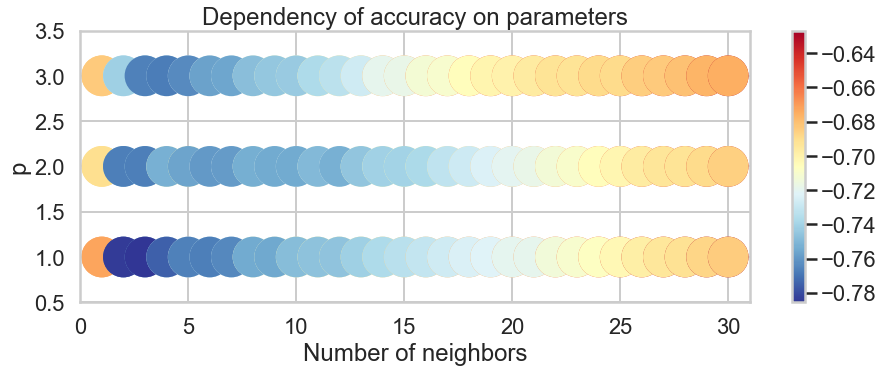

In [103]:
plt.figure(figsize=(15, 5))
sc = plt.scatter(knn_gs.cv_results_["param_knn__n_neighbors"], 
                 knn_gs.cv_results_["param_knn__p"], 
                 c=(-1)*knn_gs.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid("on")
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p")
plt.title("Dependency of accuracy on parameters")
plt.xlim([0,31])
plt.ylim([0.5, 3.5]);

Visualize the model with n = 1 to 20 and p = 1 to 5 ***

/anaconda3/envs/i526/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


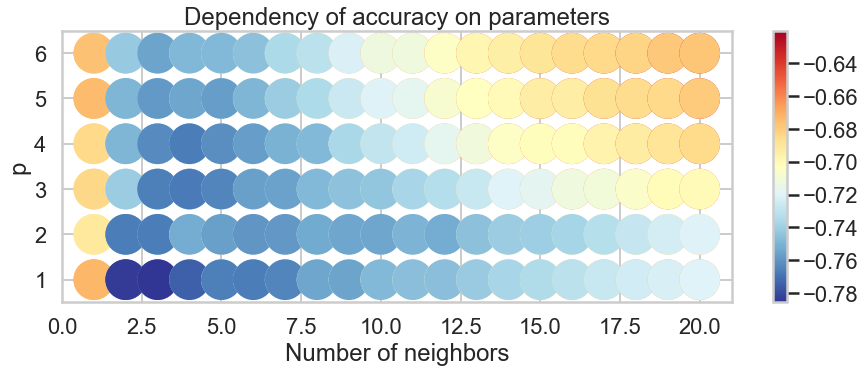

In [108]:
plt.figure(figsize=(15, 5))
sc = plt.scatter(knn_gs_20.cv_results_["param_knn__n_neighbors"], 
                 knn_gs_20.cv_results_["param_knn__p"], 
                 c=(-1)*knn_gs_20.cv_results_["mean_test_score"], 
                 cmap = plt.get_cmap("RdYlBu_r"), 
                 s=1500)
plt.colorbar(sc)
plt.grid("on")
plt.gca().set_axisbelow(True)
plt.xlabel("Number of neighbors")
plt.ylabel("p")
plt.title("Dependency of accuracy on parameters")
plt.xlim([0,21])
plt.ylim([0.5, 6.5]);

*** The model accuracy is based on negative mean squared error which then I multiplied by -1 to get the mean squared error.

### Interpreting the results

* By implementing different hyperparameters for Grid Search with KNN as a Regression problem, we see that after 10 neigbors (n), the  model performs poorly and thus we expect poor predictions.
* The best model for predicting Boston Housing Prices consists of the following hyperparameters:
    1. neighbor = 3
    2. weighted distance
    3. Manhattan distance (p = 1)
* For this task, I ignore the Linear Regression model as it was just to warm-up the process.  